# Predicting Sale Prices for Ames Iowa Housing Dataset

#### By: Julia Kelman: [GitHub](https://git.generalassemb.ly/julia-kelman/)

## Problem Statement

Creating an app so individuals can estimate the price of their homes before they sell. 

## Executive Summary

## Table of Contents 

- [Ames Housing Data Import](#Loading-Data) 
- [Data Cleaning](#Data-Cleaning) 
- [Exploratory Data Analysis](#EDA) 
- [Model Preparation](#Model-Preparation)

## Loading Data

In [152]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading the dataset: 
df = pd.read_csv('../datasets/train.csv') 

In [3]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.shape

(2051, 81)

## Data Cleaning

In [6]:
# Get total nulls 
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
df.isnull().sum().sum()

9822

In [8]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Let's investigate and reformat those columns to minimize the number of missing values and get the data ready for modeling.

In [10]:
# Investigating MS Zoning feature
df['MS Zoning'].unique()
# This dataset does not include the category 'RP'. As a result, when using this feature into a model we will need
# to create dummy variables and keep every one of them. If any testing set contains rows with 0s as a value for every
# dummy column we know this data point has a category of 'RP'. 

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [11]:
# Investigating Alley feature
df['Alley'].describe()
# The majority of the alley data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No alley access'. We can therefore reformat this feature to include this information.  

count      140
unique       2
top       Grvl
freq        85
Name: Alley, dtype: object

In [12]:
# Reformating Alley feature to remove the NaNs
df['Alley'] = df['Alley'].map({np.nan: 'No_alley', 'Pave':'Pave', 'Grvl':'Grvl'})

In [13]:
# Investigating Basement Quality feature 
df['Bsmt Qual'].unique()
# Some basement quality data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No basement'. We can therefore reformat this feature to include this information.  

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [14]:
# Reformating Basement Quality feature to remove the NaNs (0 is no basement)
df['Bsmt Qual'] = df['Bsmt Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [15]:
# Investigating Basement Quality feature 
df['Bsmt Cond'].unique()
# Some basement condition data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No basement'. We can therefore reformat this feature to include this information.  

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [16]:
# Reformating Basement Condition feature to remove the NaNs (0 is no basement)
df['Bsmt Cond'] = df['Bsmt Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [17]:
# Investigating Basement Exposure feature 
df['Bsmt Exposure'].unique()
# Some basement condition data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No basement'. We can therefore reformat this feature to include this information.  

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [18]:
# Reformating Basement Exposure feature to remove the NaNs (0 is no basement)
df['Bsmt Exposure'] = df['Bsmt Exposure'].map({np.nan: 0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

In [19]:
# Investigating Basement Finished type 1 feature 
df['BsmtFin Type 1'].unique()
# Some basement finished type 1 data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No basement'. We can therefore reformat this feature to include this information.

array(['GLQ', 'Unf', 'ALQ', 'Rec', nan, 'BLQ', 'LwQ'], dtype=object)

In [20]:
# Reformating Basement finished type 1 feature to remove the NaNs (0 is no basement)
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [21]:
# Investigating Basement Finished type 2 feature 
df['BsmtFin Type 2'].unique()
# Some basement finished type 2 data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No basement'. We can therefore reformat this feature to include this information.

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [22]:
# Reformating Basement finished type 2 feature to remove the NaNs (0 is no basement)
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [23]:
# Investigating Fireplace Quality feature 
df['Fireplace Qu'].unique()
# Some fireplace quality data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No fireplace'. We can therefore reformat this feature to include this information.

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [24]:
# Reformating fireplace quality feature to remove the NaNs (0 is no basement)
df['Fireplace Qu'] = df['Fireplace Qu'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [25]:
# Investigating Garage Type feature 
df['Garage Type'].unique()
# Some garage type data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No garage'. We can therefore reformat this feature to include this information.

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [26]:
# Reformating garage type feature to remove the NaNs (0 is no basement)
df['Garage Type'] = df['Garage Type'].map({np.nan: 'No Garage', 'Detchd':'Detchd', 'CarPort':'CarPort', 'BuiltIn':'BuiltIn', 'Basment':'Basment', 'Attchd':'Attchd', '2Types':'2Types'})

In [27]:
# Investigating Garage Year Built feature
df['Garage Yr Blt'].describe()
# A maximum year of 2207 does not make sense. Let's invistigate further to see if this data can be corrected.

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [28]:
df['Garage Yr Blt'].sort_values(ascending=False).head()

1699    2207.0
144     2010.0
1241    2010.0
589     2009.0
1796    2009.0
Name: Garage Yr Blt, dtype: float64

In [29]:
# Let's take a closer look at the 1699 row 
df.loc[1699, :]
# Considering that the house was built in 2006 and remodeled in 2007. It is a safe assumption to make that 2207 should be 2007.

Id                      2261
PID                916384070
MS SubClass               20
MS Zoning                 RL
Lot Frontage              68
Lot Area                8298
Street                  Pave
Alley               No_alley
Lot Shape                IR1
Land Contour             HLS
Utilities             AllPub
Lot Config            Inside
Land Slope               Gtl
Neighborhood          Timber
Condition 1             Norm
Condition 2             Norm
Bldg Type               1Fam
House Style           1Story
Overall Qual               8
Overall Cond               5
Year Built              2006
Year Remod/Add          2007
Roof Style               Hip
Roof Matl            CompShg
Exterior 1st         VinylSd
Exterior 2nd         VinylSd
Mas Vnr Type             NaN
Mas Vnr Area             NaN
Exter Qual                Gd
Exter Cond                TA
Foundation             PConc
Bsmt Qual                  4
Bsmt Cond                  3
Bsmt Exposure              3
BsmtFin Type 1

In [30]:
# Correcting the erroneous Garage year built datapoint 
df.loc[1699, 'Garage Yr Blt'] = 2007

In [31]:
# Investigating the Garage Finish feature 
df['Garage Finish'].unique()
# Some garage finish data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No garage'. We can therefore reformat this feature to include this information.

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [32]:
# Reformating garage finish feature to remove the NaNs (0 is no basement)
df['Garage Finish'] = df['Garage Finish'].map({np.nan: 'No Garage', 'Unf':'Unf', 'RFn':'RFn', 'Fin':'Fin'})

In [33]:
# Investigating the Garage Quality feature
df['Garage Qual'].unique()
# Some garage quality data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No garage'. We can therefore reformat this feature to include this information.

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [34]:
# Reformating garage quality feature to remove the NaNs (0 is no basement)
df['Garage Qual'] = df['Garage Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [35]:
# Investigating the Garage Condition feature
df['Garage Cond'].unique()
# Some garage condition data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No garage'. We can therefore reformat this feature to include this information.

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [36]:
# Reformating garage quality feature to remove the NaNs (0 is no basement)
df['Garage Cond'] = df['Garage Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [37]:
# Investigating the Pool Quality feature
df['Pool QC'].unique()
# Some pool quality data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No Pool'. We can therefore reformat this feature to include this information.

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [38]:
# Reformating pool quality feature to remove the NaNs (0 is no basement)
df['Pool QC'] = df['Pool QC'].map({np.nan: 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [39]:
# Investigating the Fence feature
df['Fence'].unique()
# Some fence data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'No Fence'. We can therefore reformat this feature to include this information.

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [40]:
# Reformating fence feature to remove the NaNs (0 is no basement)
df['Fence'] = df['Fence'].map({np.nan: 'No Fence', 'MnWw':'MnWw', 'GdWo':'GdWo', 'MnPrv':'MnPrv', 'GdPrv':'GdPrv'})

In [41]:
# Investigating the Miscelaneous feature
df['Misc Feature'].unique()
# Some miscelaneous feature data is missing. However, the original data dictionary informs us that 'NA' stands for 
# 'None'. We can therefore reformat this feature to include this information.

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [42]:
# Reformating miscelaneous feature to remove the NaNs (0 is no basement)
df['Misc Feature'] = df['Misc Feature'].map({np.nan: 'None', 'TenC':'TenC', 'Shed':'Shed', 'Othr':'Othr', 'Gar2':'Gar2', 'Elev':'Elev'})

In [43]:
# Re-evaluating missing data 
df.isnull().sum().sum()

498

In [44]:
# Let's look at the features that still have missing values: 
for column in df.columns:
    if df[column].isnull().sum() != 0: 
        print(f'{column}: {df[column].isnull().sum()}')

Lot Frontage: 330
Mas Vnr Type: 22
Mas Vnr Area: 22
BsmtFin SF 1: 1
BsmtFin SF 2: 1
Bsmt Unf SF: 1
Total Bsmt SF: 1
Bsmt Full Bath: 2
Bsmt Half Bath: 2
Garage Yr Blt: 114
Garage Cars: 1
Garage Area: 1


If we removed all the remaining missing values we would loose about 16% of our data which is a considerable amount.   
In order to keep as much data as possible we will only drop rows with missing data from columns we consider using in our model.  
As a result, let's conduct some EDA to identify those features. 

In [45]:
# Investigating data types
df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1       int64
BsmtFin SF 1       float64
BsmtFin Type 2       int64
B

In [46]:
# Id and PID should be objects 
df['Id'] = df['Id'].astype(str)
df['PID'] = df['PID'].astype(str)

In [47]:
df.dtypes.head(2)

Id     object
PID    object
dtype: object

The data is now in appropriate type. 

In [172]:
# Creating function to reproduce data cleaning and formating: 
def format_data_cleaning(dataframe): 
    dataframe['Alley'] = dataframe['Alley'].map({np.nan: 'No_alley', 'Pave':'Pave', 'Grvl':'Grvl'})
    dataframe['Bsmt Qual'] = dataframe['Bsmt Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Bsmt Cond'] = dataframe['Bsmt Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Bsmt Exposure'] = dataframe['Bsmt Exposure'].map({np.nan: 0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
    dataframe['BsmtFin Type 1'] = dataframe['BsmtFin Type 1'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    dataframe['BsmtFin Type 2'] = dataframe['BsmtFin Type 2'].map({np.nan: 0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
    dataframe['Fireplace Qu'] = dataframe['Fireplace Qu'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Garage Type'] = dataframe['Garage Type'].map({np.nan: 'No Garage', 'Detchd':'Detchd', 'CarPort':'CarPort', 'BuiltIn':'BuiltIn', 'Basment':'Basment', 'Attchd':'Attchd', '2Types':'2Types'})
    dataframe['Garage Finish'] = dataframe['Garage Finish'].map({np.nan: 'No Garage', 'Unf':'Unf', 'RFn':'RFn', 'Fin':'Fin'})
    dataframe['Garage Qual'] = dataframe['Garage Qual'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Garage Cond'] = dataframe['Garage Cond'].map({np.nan: 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    dataframe['Pool QC'] = dataframe['Pool QC'].map({np.nan: 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    dataframe['Fence'] = dataframe['Fence'].map({np.nan: 'No Fence', 'MnWw':'MnWw', 'GdWo':'GdWo', 'MnPrv':'MnPrv', 'GdPrv':'GdPrv'})
    dataframe['Misc Feature'] = dataframe['Misc Feature'].map({np.nan: 'None', 'TenC':'TenC', 'Shed':'Shed', 'Othr':'Othr', 'Gar2':'Gar2', 'Elev':'Elev'})
    dataframe['Id'] = dataframe['Id'].astype(str)
    dataframe['PID'] = dataframe['PID'].astype(str)

## EDA

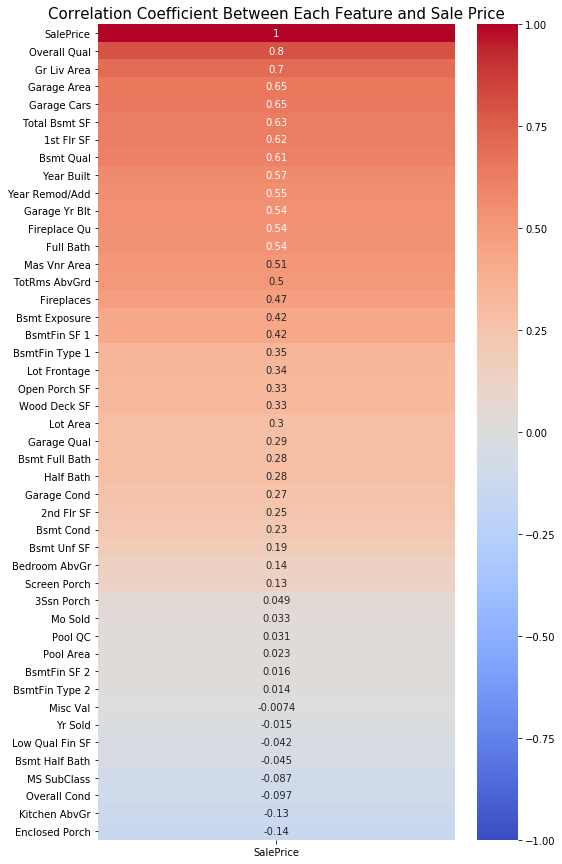

In [48]:
# Correlation heatmap to identify features with strongest correlation to our target 
plt.figure(figsize=(8, 15))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            annot=True);
plt.title('Correlation Coefficient Between Each Feature and Sale Price', size=15);
# Code for this graph has been adapted from Riley Dallas' code

Interpretation: The 15 numerical features with the highest correlation with Sale Price:  
1. Overall Quality (Overall Qual)
2. Above ground living area (Gr Liv Area)  
3. Garage Area  
4. Garage Cars  
5. Total Basement Sq Ft (Total Bsmt SF)
6. 1st Floor Sq Ft (1st Flr SF)  
7. Basement Quality (Bsmt Qual) 
8. Year Built 
9. Year Remodeled (Remod/Add)
10. Garage Yr Blt 
11. Fireplace Quality (Fireplace Qu)
12. Full Bath
13. Masonry Veneer Area (Mas Vnr Area)
14. Total Rooms above Grade (TotRms AbvGrd)
15. Fireplaces 

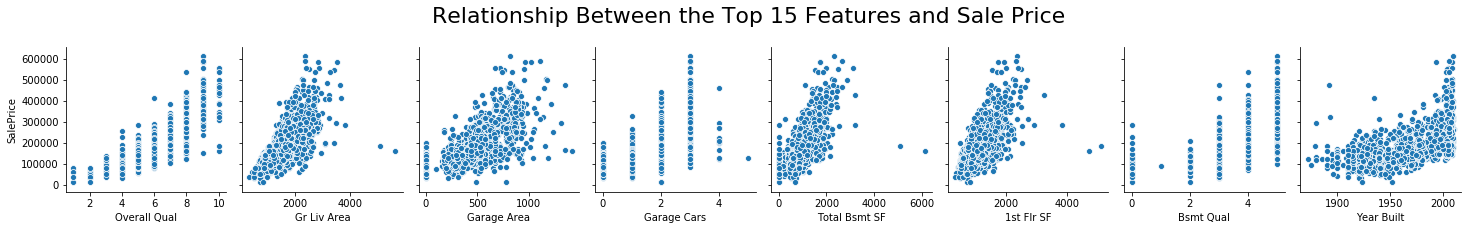

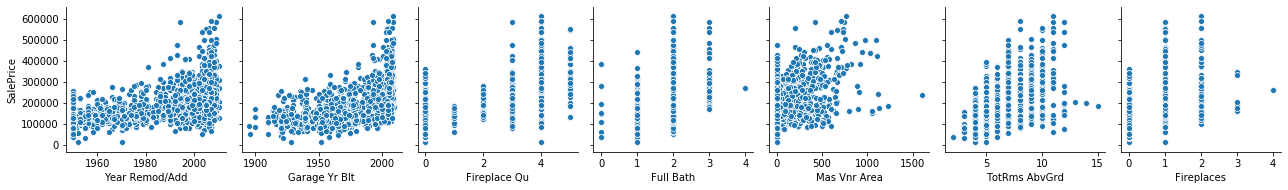

In [122]:
# Visualizing the relationship between the top 15 features and Sale Price: 
sns.pairplot(df, x_vars=['Overall Qual', 'Gr Liv Area','Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Year Built'], y_vars=['SalePrice']).fig.suptitle("Relationship Between the Top 15 Features and Sale Price",y = 1.2, size=22);
sns.pairplot(df, x_vars=['Year Remod/Add', 'Garage Yr Blt', 'Fireplace Qu', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces'], y_vars=['SalePrice']);

Interpretation:  
Only Overall quality, Garage Area, Gr Lv Area, Total basement SF and 1st Floor SF seem to have a linear relationship with Sale Price. However, we notice that the data gets more widely distributed for larger values.  

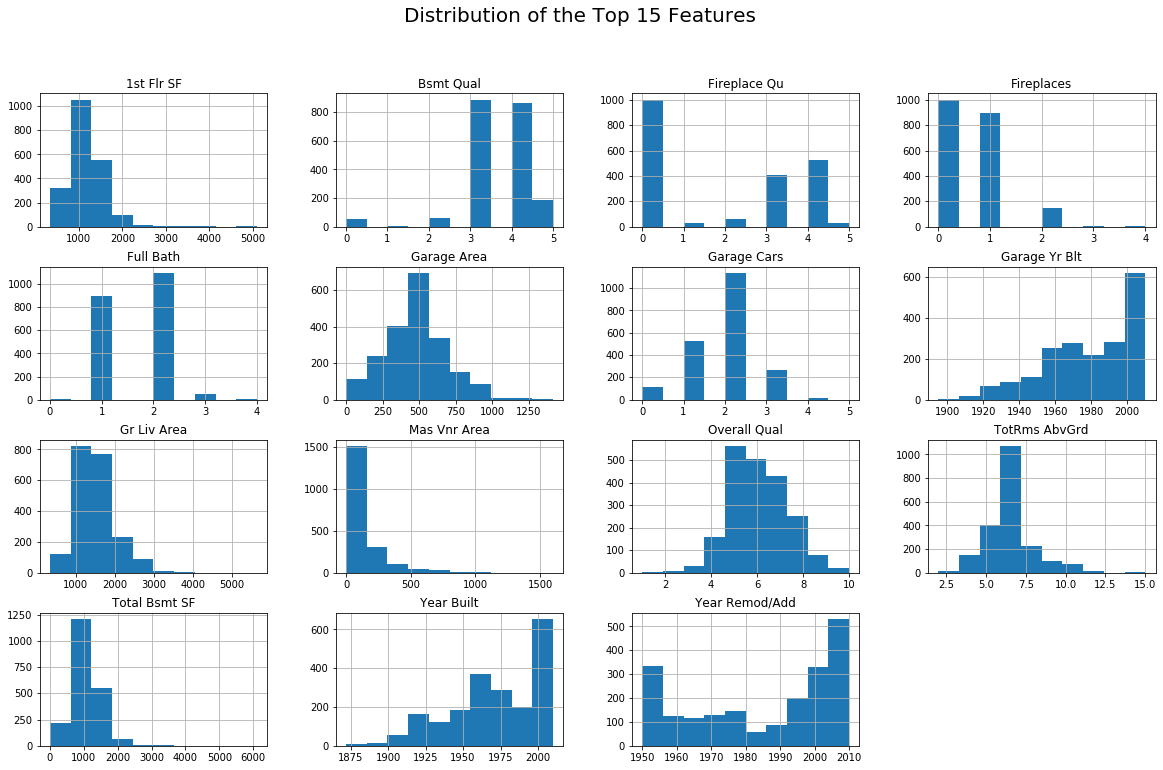

In [123]:
df[['Overall Qual', 'Gr Liv Area','Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 
    'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Fireplace Qu', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 
    'Fireplaces']].hist(figsize=(20,12));
plt.suptitle('Distribution of the Top 15 Features', size=20);

Interpretation:  
- None of the features seem to have a true normal distribtion.  
- 1st Floor SF, Garage Area, Garage cars, Gr Liv Area, Overall Quality, Total Rooms Above Ground, and Total Basement SF are the only features with a distribution close to a normal distribustion. However, they are all right skewed (except for Overall Quality). 

## Baseline Model 

In [ ]:
# predict the mean (y_train mean)

## Model 1: Top "5" numeric features 

### EDA (part 2)

In [135]:
df.dropna(subset = ['Overall Qual', 'Garage Area', 'Gr Liv Area', 'Total Bsmt SF'], inplace=True)

In [136]:
df.shape

(2049, 81)

### Model Prepatation

In [138]:
features_1 = ['Overall Qual', 'Garage Area', 'Gr Liv Area', 'Total Bsmt SF']
# 1st floor sq ft was not included because this information is already included in the 'Gr Liv Area' feature 
X = df[features_1]
y = df['SalePrice']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =2)

In [147]:
lr_1 = LinearRegression()

### Modeling

In [182]:
# Cross_val_score: 
cross_val_score(lr_1, X, y, cv=5).mean()

0.7841383647637505

In [149]:
lr_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
lr_1.score(X_train, y_train)

0.778790261383897

In [151]:
lr_1.score(X_test, y_test)

0.7622594845811731

In [153]:
#Calculating RMSE
def calc_rmse(model, X, y): 
    model_prediction = model.predict(X)
    MSE = metrics.mean_squared_error(y, model_prediction)
    RMSE = np.sqrt(MSE)
    return print(f' The RMSE is {RMSE}')

In [155]:
calc_rmse(lr_1, X_train, y_train)

 The RMSE is 37465.4526225636


In [154]:
calc_rmse(lr_1, X_test, y_test)

 The RMSE is 37984.495746627086


## Model 2: Top "10" Numeric Features

### Model Prep

In [156]:
features_2 = ['Overall Qual', 'Garage Area', 'Gr Liv Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Garage Cars', 'Bsmt Qual', 'Year Built', 'Year Remod/Add']
# 1st floor sq ft was not included because this information is already included in the 'Gr Liv Area' feature 
X = df[features_2]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =2)

lr_2 = LinearRegression()

### Modeling

In [183]:
# Cross_val_score: 
cross_val_score(lr_2, X, y, cv=5).mean()

0.7841383647637505

In [161]:
lr_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
lr_2.score(X_train, y_train)

0.792894016613587

In [163]:
lr_2.score(X_test, y_test)

0.7756402298604732

In [164]:
calc_rmse(lr_2, X_train, y_train)

 The RMSE is 36251.43356377376


In [165]:
calc_rmse(lr_2, X_test, y_test)

 The RMSE is 36900.0758312225


## Model 3: including non-numerical features that can be reformated

### Model Prep

In [180]:
# Reformat Lot Shape with level of irregularity: 0,1,2,3
df['Lot Shape'] = df['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3})

In [181]:
# Reformat central air: Y: 1, N: 0 
df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0})

In [186]:
# Create a variabe for age based on YearRemodAdd and Year sold 
df['Age'] = df['Yr Sold'] - df['Year Remod/Add']

In [187]:
# Reformat functionality feature: 1,2,3,4,5,6,7,8 
df['Functional'] = df['Functional'].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

In [189]:
# Create total number of rooms above ground (including bathrooms): 
df['True TotRms AbvGrd'] =  df['TotRms AbvGrd'] + df['Full Bath'] + df['Half Bath'] 

In [201]:
df.dropna(subset=['Mas Vnr Area'], inplace=True)

In [209]:
features_3 = ['Overall Qual', 'Garage Area', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars', 'Bsmt Qual','Year Built',
               'Lot Shape', 'Central Air', 'Age', 'Functional', 'True TotRms AbvGrd', 'Mas Vnr Area', 'Fireplaces']
# 1st floor sq ft was not included because this information is already included in the 'Gr Liv Area' feature 
# remove year remod/add because included in age 
# remove TotRms AbvGrd because included in True TotRmsAbvGrd
X = df[features_3]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =5)

lr_3 = LinearRegression()

### Modeling

In [210]:
# Cross_val_score: 
cross_val_score(lr_3, X, y, cv=5).mean()

0.7965042948817066

In [211]:
lr_3.fit(X_train, y_train)

# Training score 
lr_3.score(X_train, y_train)
print(f' Training Score: {lr_3.score(X_train, y_train)}')
      
#Testing score
lr_3.score(X_test, y_test)
print(f' Testing Score: {lr_3.score(X_test, y_test)}')

 Training Score: 0.7980375790019002
 Testing Score: 0.8179377037863323


In [212]:
calc_rmse(lr_3, X_train, y_train)
calc_rmse(lr_3, X_test, y_test)

 The RMSE is 35798.5987402427
 The RMSE is 33038.48626330287


## Model Preparation

In [ ]:
# Creating function to reproduce data cleaning and formating: 
def format_model_prep(datafame): 
    dataframe['Lot Shape'] = dataframe['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3})
    dataframe['Utilities'] = dataframe['Utilities'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub':4})
    dataframe['Land Slope'] = dataframe['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
    dataframe['Central Air'] = dataframe['Central Air'].map({'Y':1, 'N':0})
    dataframe['Functional'] = dataframe['Functional'].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

In [ ]:
# Reformat Land Slope: 1,2,3 
df['Land Slope'] = df['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})

In [184]:
# Reformat Utilities with number of utilities: 1, 2, 3, 4 
df['Utilities'] = df['Utilities'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub':4})

In [ ]:
# Make MS Zoning dummies - do not drop first 

In [ ]:
# Make dummy variables for Lot configuration

In [ ]:
# Create dummies for Condition 1 

In [ ]:
# Create dummies for Bldg Type 

In [ ]:
# Create dummies for House Style 

In [ ]:
features_1 = ['MS Zoning', 'Lot Area', 'Lot Shape', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1',
              'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Bsmt Qual', 'Total Bsmt SF', 'Central Air',
              'Gr Liv Area, tot num rooms above, functional, fireplace,  
# pool area, garage area, mics val', age 

In [ ]:
features = ["Overall Qual", "Lot Area", "Full Bath"]
# MS Zoning, Lot Area, Lot Shape, Utilities, Lot Config, Land Slope, Condition 1, Bldg Type, House Style, Overall Qual
# Overall Cond, Age, Bsmt Qual, Bsmt Fin SF1, central air, Gr Liv Area, tot num rooms above, functional, fireplace,  
# pool area, garage area, mics val
# add: Neighborhood, Exter Qual, Exter Cond, Bsmt Cond, switch Bsmt Fin SF1 for TotalBsmtSF, heating, 
# heating OC, garage type, paved drive, month sold, sale type 
X = data[features]
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [ ]:
# Create dummies for Neighborhood 

In [ ]:
# Reformat Exterior Material Quality: 1, 2, 3, 4, 5 

In [ ]:
# Reformat exterior material condition: 1, 2, 3, 4, 5 

In [ ]:
# check is rest of features additional need formating 

## Modeling

### Baseline Model

### Linear Regression

In [ ]:
# Instantiate
lr = LinearRegression()

# Fit 
lr.fit(X_train, y_train)

In [ ]:
# Trainign score 
lr.score(X_train, y_train)  

In [ ]:
# Testing Score 
lr.score(X_test, y_test)  

In [ ]:
# Cross Val Score 

### Ridge 

### Lasso

## Model Selection

## Model Evaluation

In [ ]:
# includes visualization

In [ ]:
# RMSE 

## Conclusion

## Recommendations

## References

----

# Kaggle Submission

Whatever you did to the first dataset, you MUST do to the validation/hold-out set

In [166]:
# Load validation set
val = pd.read_csv('../datasets/test.csv')  

In [167]:
val.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [168]:
val.shape

(878, 80)

In [173]:
## Val EDA 
format_data_cleaning(val)

## Submission 1

In [174]:
# filter features 
filtered_val = val[features_2]

In [175]:
filtered_val.head()

,Overall Qual,Garage Area,Gr Liv Area,Total Bsmt SF,TotRms AbvGrd,Garage Cars,Bsmt Qual,Year Built,Year Remod/Add
0,6,440,1928,1020,9,1,2,1910,1950
1,5,580,1967,1967,10,2,4,1977,1977
2,7,426,1496,654,7,2,4,2006,2006
3,5,480,968,968,5,2,3,1923,2006
4,6,514,1394,1394,6,2,4,1963,1963


In [176]:
# make prediction with model! 
preds = lr_2.predict(filtered_val)

In [177]:
preds[:10]

array([166341.39860238, 216177.34865324, 200018.65787502, 125388.33051882,
       181904.87899021,  91033.30216267, 106682.07017544, 148653.84770656,
       221418.7260269 , 171157.37602605])

In [178]:
# We need to submit to Kaggle in the appropriate form of .csv 

# create prediction Series
preds_col = pd.Series(preds, name = "SalePrice")

# combine with Id
id_col    = val["Id"]
output = pd.concat([id_col, preds_col], axis = 1)
output.head()

,Id,SalePrice
0,2658,166341.398602
1,2718,216177.348653
2,2414,200018.657875
3,1989,125388.330519
4,625,181904.878990


In [179]:
# write to csv 

output.to_csv('../output/submission_1.csv', index = False)